In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  General Parameters
P = 2.2 #[atm] Pressure (assuming no pressure drop)
mu = 3.0e-5  # [Pa s] Viscosity as given
ep = 0.6 # Void fraction        
v_s = 1.0 # [m/s] Given superficial velocity
d_t = 0.05 #[m] inner diameter
radius = d_t/2.0 # [m] Radius
L = 5.0 #[m] Length of tube
k_0 = np.exp(20.348) # Parameter from equation for rate constant            
T_act = 13636 # Activation Temperature

# Concentration Parameters
D_r = 3.8e-4 # [m^2/s]  Radial Diffusivity         
c_ox_in = 0.4144  #[mol/m^3]

# Temperature Parameters
delH  = -307.0 #[kcal/mol]
Twall = 640   # [K] Wall temperature
kappa = 0.4   # Thermal conductivity
Cp = 0.237 # [cal/g*K] Heat capacity 
heat = -307000   # [cal/mol] heat of reaction to mass units
rho = 1.29 # Gas density at the inlet             
hr = 120  #[W/m^2-K] heat transfer coefficient
T_in = 600 # [K]             
E_r = kappa/rho/Cp

# Method of Lines parameters
N = 5 # Number of nodes
r = np.linspace(0, radius, N) # Create node positions along radius
h = r[1] - r[0]              

zstep = v_s*h**2 / 4 / E_r
z = np.arange(0,5,zstep)

In [3]:
def ODE_ox(C, T ,r):
    dCdz = np.zeros(N)
    dCdz[0] = (4*D_r/(v_s*h**2))*(C[1]-C[0]) - (ep*k_0/v_s)*np.exp(-T_act/T[0])*C[0]
    for i in range(1,N-1):
        dCdz[i] = (D_r/(v_s*h**2))*((2*i +1)*C[i+1]/(2*i) - 2*C[i] + (2*i - 1)*C[i-1]/(2*i)) - (ep*k_0/v_s)*np.exp(-T_act/T[i])*C[i]
    return dCdz

def ODE_T(C, T ,r):
        dTdz = np.zeros(N) # Initialize and leave dTdz[0] as 0 (boundary condition)
        dTdz[0] = (4*E_r/(v_s*h**2))*(C[1]-C[0]) - (ep*k_0*delH*C[0]/(v_s*rho*Cp))*np.exp(-T_act/T[0])
        for i in range(1,N-1):
                dTdz[i] = (E_r/(v_s*h**2)) * ((2*i +1)*T[i+1]/(2*i) - 2*T[i] + (2*i - 1)*T[i-1]/(2*i)) - (ep*k_0*delH*C[i]/(v_s*rho*Cp))*np.exp(-T_act/T[i])   
        return dTdz
        

ox = c_ox_in*np.ones(N) # Becomes initial value in loop
ox_mat = np.zeros((len(ox),len(z))) # Store concentration in nodes as a matrix
T = T_in*np.ones(ox.shape)   # Initial temperature in nodes
T_mat = np.zeros((len(T), len(z)))  # Store node temperature in a matrix

ox_mat[:,0] = ox
T_mat[:,0] = T

for i in range(len(z)):
         
    ox_change = ODE_ox(ox,T,r)
    T_change = ODE_T(ox,T,r)

    # Apply Boundary Conditions
    ox[N-1] = (18.0*ox[N-2] - 9.0*ox[N-3] + 2.0*ox[N-4])/11.0
    T[N-1] = (6*h*hr*Twall + 18*kappa*T[N-2] - 9*kappa*T[N-3] + 2*kappa*T[N-4])/(6*h*hr + 11*kappa)

    # Update Loop
    ox += zstep*ox_change
    T += zstep*T_change

    # Update Matrices
    ox_mat[:,i] = ox
    T_mat[:,i] = T

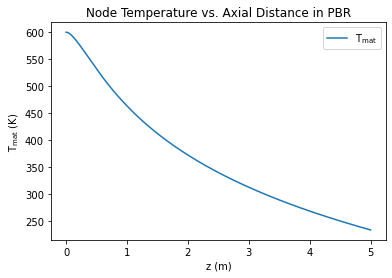

In [4]:
#Plotting
plt.plot(z, T_mat[0,:], label="T$\mathregular{_{mat}}}$")
plt.xlabel("z (m)")
plt.ylabel("T$\mathregular{_{mat}}$ (K)")
plt.legend(loc="upper right")
plt.title("Node Temperature vs. Axial Distance in PBR")
plt.show()